In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("ProjectHousing.csv")

In [4]:
data.head(5)

,Unnamed: 0,Price,Bedroom,Bathroom,sqft,zipcode,Address
0,0,"$289,900",3 Bd,2 Bath,"1,431 Sqft",13084,"1839 Collins Road,\n \n Pompey, N..."
1,1,"$199,900",3 Bd,1 Bath,985 Sqft,13084,"5850 Winacre Drive,\n \n La Fayet..."
2,2,"$114,900",3 Bd,2 Bath,"1,274 Sqft",13084,"3439 Route 11,\n \n La Fayette, N..."
3,3,"$205,092",3 Bd,1 Bath,"1,260 Sqft",13077,"5390 Mead Road,\n \n Homer, NY 13077"
4,4,"$24,900",1 Bd,1 Bath,842 Sqft,13120,"155 Meredith Avenue,\n \n Onondag..."


In [7]:
data.shape

(107294, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107294 entries, 0 to 107293
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  107294 non-null  int64 
 1   Price       107294 non-null  object
 2   Bedroom     78552 non-null   object
 3   Bathroom    78552 non-null   object
 4   sqft        78552 non-null   object
 5   zipcode     107294 non-null  object
 6   Address     107294 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.7+ MB


In [11]:
data = data.drop('Unnamed: 0',axis=1)

In [13]:
data.isnull().sum()

Price           0
Bedroom     28742
Bathroom    28742
sqft        28742
zipcode         0
Address         0
dtype: int64

In [15]:
data.describe()

,Price,Bedroom,Bathroom,sqft,zipcode,Address
count,107294,78552,78552,78552,107294,107294
unique,5155,24,22,4959,3726,47407
top,"$199,900",3 Bd,2 Bath,"1,200 Sqft",24016,"0 MARCELLO DRIVE,\n \n POTTSVILLE..."
freq,881,35286,30587,519,357,103


In [16]:
data['Price'] = pd.to_numeric(data['Price'].str.replace('[$,]', '', regex=True))


In [18]:
data['Price']

0          289900
1          199900
2          114900
3          205092
4           24900
           ...   
107289     179900
107290      69900
107291     244000
107292    1150000
107293     129900
Name: Price, Length: 107294, dtype: int64

In [19]:

data['Bedroom'] = pd.to_numeric(data['Bedroom'].str.extract('(\d+)')[0])
data['Bathroom'] = pd.to_numeric(data['Bathroom'].str.extract('(\d+)')[0])


In [21]:
data['sqft'] = pd.to_numeric(data['sqft'].str.replace('[, Sqft]', '', regex=True))


In [23]:
data.head(5)

,Price,Bedroom,Bathroom,sqft,zipcode,Address
0,289900,3.0,2.0,1431.0,13084,"1839 Collins Road,\n \n Pompey, N..."
1,199900,3.0,1.0,985.0,13084,"5850 Winacre Drive,\n \n La Fayet..."
2,114900,3.0,2.0,1274.0,13084,"3439 Route 11,\n \n La Fayette, N..."
3,205092,3.0,1.0,1260.0,13077,"5390 Mead Road,\n \n Homer, NY 13077"
4,24900,1.0,1.0,842.0,13120,"155 Meredith Avenue,\n \n Onondag..."


In [24]:
(data.isnull().sum())/(data.shape[0])

Price       0.000000
Bedroom     0.267881
Bathroom    0.267881
sqft        0.267881
zipcode     0.000000
Address     0.000000
dtype: float64

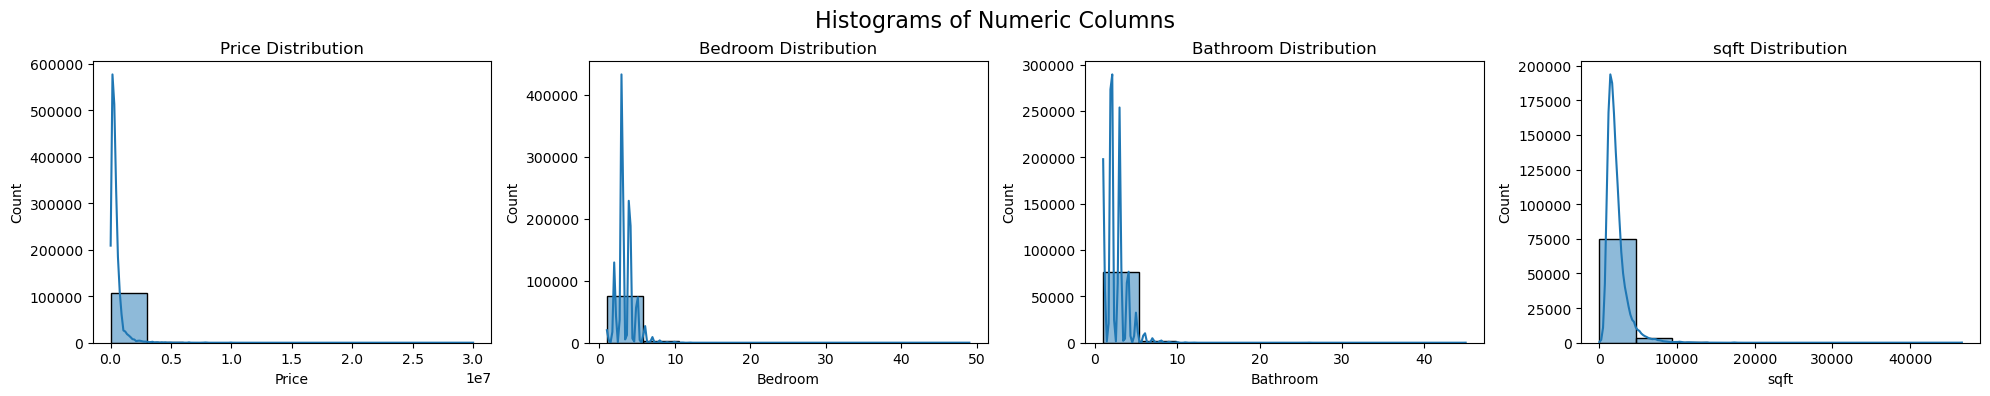

In [25]:
import warnings
warnings.filterwarnings("ignore")

numeric_columns = data.select_dtypes(include='number').columns
num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 4))
fig.suptitle('Histograms of Numeric Columns', fontsize=16)

for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  
plt.show()




In [26]:
#boxplot to see outliers in the dataset

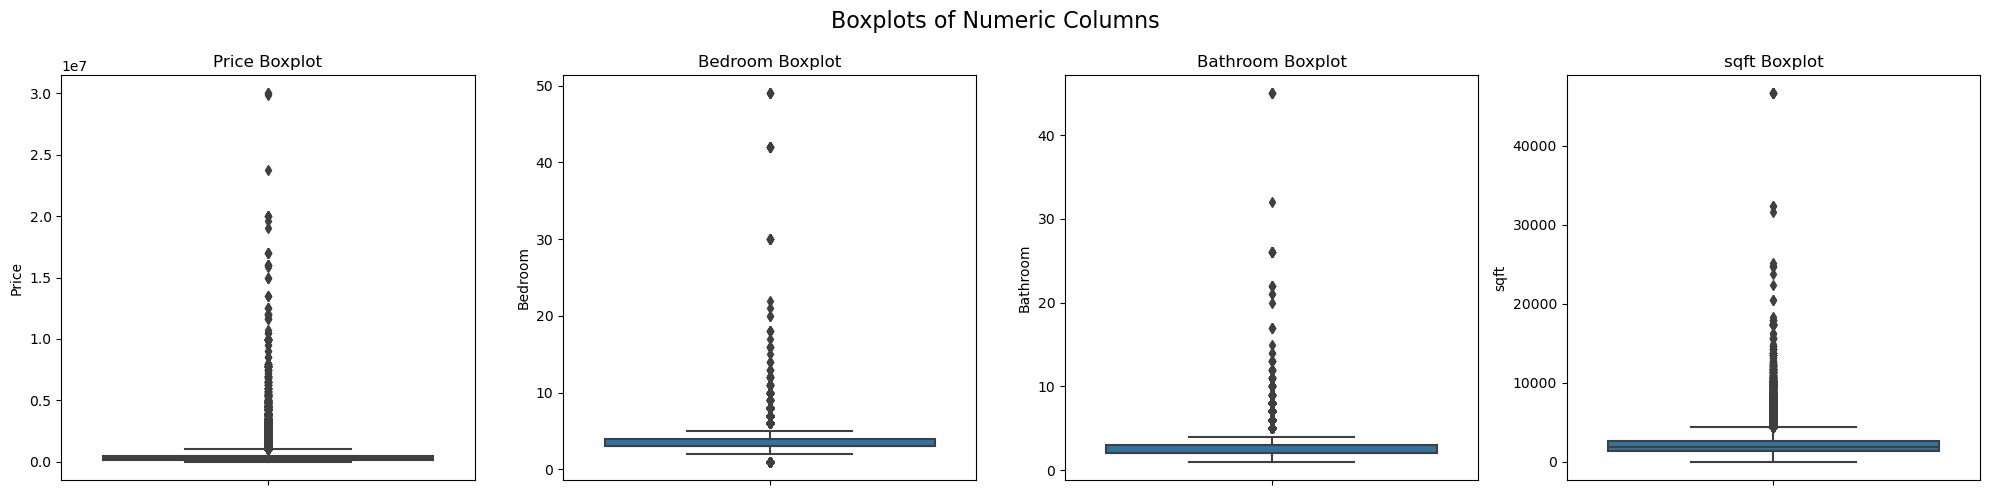

In [27]:

fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 5))
fig.suptitle('Boxplots of Numeric Columns', fontsize=16)

# Plot each boxplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Leave space for the main title
plt.show()

<Axes: >

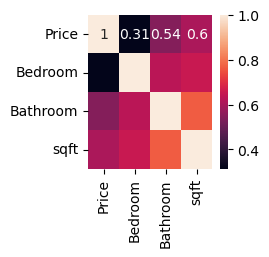

In [29]:
s = data.select_dtypes(include='number').corr()
plt.figure(figsize=(2,2))
sns.heatmap(s,annot=True)

### Missing Value Treatment

In [31]:
data.isnull().sum()

Price           0
Bedroom     28742
Bathroom    28742
sqft        28742
zipcode         0
Address         0
dtype: int64

In [35]:
import time
s1 = time.time()
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors=2)

for i in ['Bedroom','Bathroom','sqft']:
    data[i] = impute.fit_transform(data[[i]])
s2 = time.time()
print(f"Execution time: {s2-s1} seconds")


Execution time: 842.7027184963226 seconds


In [36]:
data.isnull().sum()

Price       0
Bedroom     0
Bathroom    0
sqft        0
zipcode     0
Address     0
dtype: int64

In [37]:
def wisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw,uw

In [38]:
t1 = time.time()
for i in ['Bedroom','Bathroom','sqft']:
    lw,uw = wisker(data[i])
    data[i] = np.where(data[i]<lw,lw,data[i])
    data[i] = np.where(data[i]>uw,uw,data[i])
t2 = time.time()
print(f"Execution time: {t2-t1} seconds")


Execution time: 0.018904924392700195 seconds


In [39]:
# Drop the duplicates

In [40]:
data.drop_duplicates()

,Price,Bedroom,Bathroom,sqft,zipcode,Address
0,289900,3.000000,2.000000,1431.000000,13084,"1839 Collins Road,\n \n Pompey, N..."
1,199900,3.000000,1.000000,985.000000,13084,"5850 Winacre Drive,\n \n La Fayet..."
2,114900,3.000000,2.000000,1274.000000,13084,"3439 Route 11,\n \n La Fayette, N..."
3,205092,3.000000,1.000000,1260.000000,13077,"5390 Mead Road,\n \n Homer, NY 13077"
4,24900,1.500000,1.000000,842.000000,13120,"155 Meredith Avenue,\n \n Onondag..."
...,...,...,...,...,...,...
107243,79900,3.467066,2.472057,2197.183153,24986,"Lot 80, White Rock Trl,\n \n Cald..."
107272,239000,2.000000,1.000000,864.000000,24993,"821 Belleview Road,\n \n Wolfcree..."
107273,1850000,3.467066,2.472057,2197.183153,24993,"450 Belleview Road,\n \n Wolf Cre..."
107274,1850000,5.500000,4.500000,3331.000000,24993,"948 Belleview Road,\n \n Wolfcree..."


In [41]:
data.shape

(107294, 6)

In [42]:
data.head(6)

,Price,Bedroom,Bathroom,sqft,zipcode,Address
0,289900,3.0,2.0,1431.0,13084,"1839 Collins Road,\n \n Pompey, N..."
1,199900,3.0,1.0,985.0,13084,"5850 Winacre Drive,\n \n La Fayet..."
2,114900,3.0,2.0,1274.0,13084,"3439 Route 11,\n \n La Fayette, N..."
3,205092,3.0,1.0,1260.0,13077,"5390 Mead Road,\n \n Homer, NY 13077"
4,24900,1.5,1.0,842.0,13120,"155 Meredith Avenue,\n \n Onondag..."
5,80000,4.0,1.0,1330.0,13120,"104 West Roswell Avenue,\n \n Ono..."


In [43]:
y = data['Price']
x = data.drop(['Price', 'Address'], axis=1) 

In [44]:
x = pd.get_dummies(x, columns=['zipcode'], drop_first=True) 

In [45]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=42)

In [46]:
# before scaling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 231191218479.13263
R^2 Score: 0.3665739795226468


In [ ]:
from sklearn.preprocessing import StandardScaler as SS
ss = SS()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:

from sklearn.tree import DecisionTreeClassifier
t1 = time.time()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
t2 = time.time()
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Execution time: {t2-t1} seconds")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
t1 = time.time()
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
t2 = time.time()
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Execution time: {t2-t1} seconds")

In [ ]:
from sklearn.svm import SVC
t1 = time.time()
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
t2 = time.time()
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Execution time: {t2-t1} seconds")